In [15]:
import numpy as np
from src.PLS.metaSIR import meta_no_ext_sir
from src.PLS.metaSIR import meta_sir
from src.PLS.metaSIR import meta_timed_sir
from decimal import Decimal, ROUND_UP
import time
from src.PLS.metaSIR import basic_square_map
from src.PLS.metaSIR import straight_line_distances
from src.PLS.metaSIR import basic_kernel
from matplotlib.lines import Line2D

distance_measure_array = ["sum_sq","sum_sqrt_sq","mixed","rinf","meta"]
dis = distance_measure_array[-1]
seed = 2
N = 4
test_map = basic_square_map(N)
test_distances = straight_line_distances(test_map,N,scaling=10)

R0 = 5
gamma = 1
X0 = [[999,1,0]]
div = sum(X0[0])
for i in range(N-1):
    X0.append([1000,0,0])
beta = R0/div
rng = np.random.default_rng(seed)
tstep = 0.01
tmax = 100
tmax = float(Decimal(tstep) * (Decimal(meta_timed_sir(X0,beta,gamma,N,test_distances,basic_kernel,tmax,tstep,rng) )/ Decimal(tstep)).quantize(1,rounding=ROUND_UP))
rng = np.random.default_rng(seed)
print(tmax)
reality_3 = meta_no_ext_sir(X0,beta,gamma,N,test_distances,basic_kernel,tmax,tstep,rng)

13.83


In [16]:
print(len(reality_3))

1383


C:\Users\ollie\AppData\Local\Temp\ipykernel_14844\1978026289.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


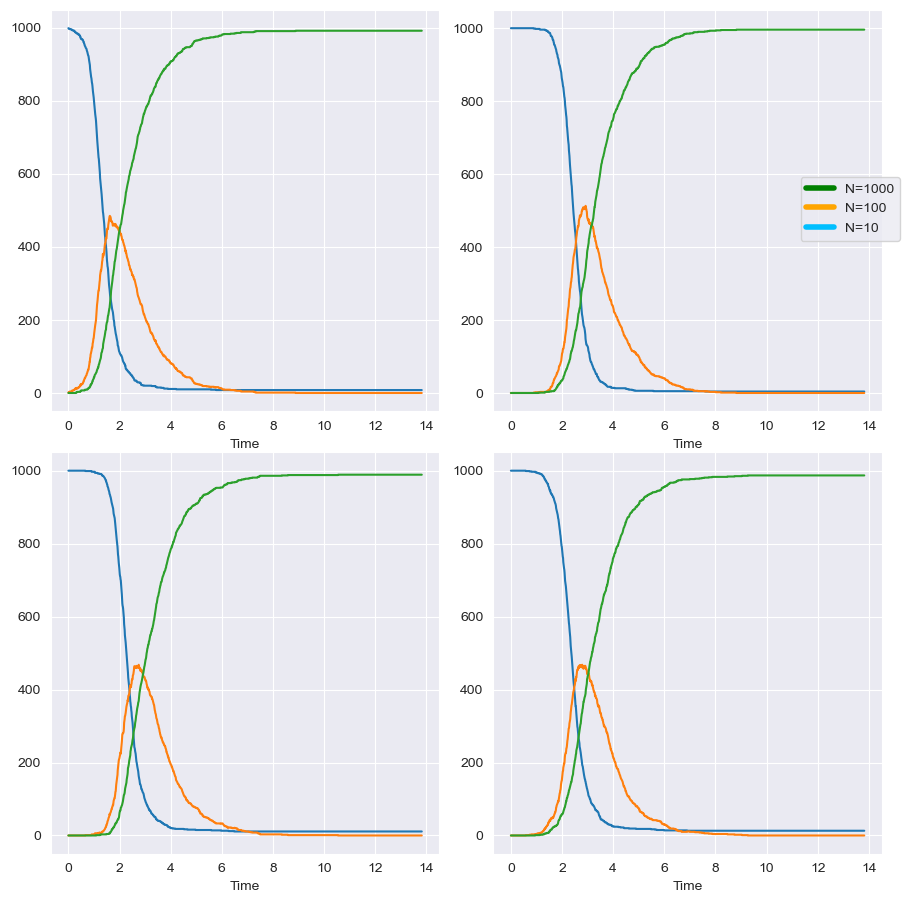

In [17]:
from matplotlib import pyplot as plt
node1 = reality_3[:, 0]
node2 = reality_3[:, 1]
node3 = reality_3[:, 2]
node4 = reality_3[:, 3]
final = sum([node1, node2, node3, node4])
test_times = np.arange(0, tmax, tstep)
fig, ax0 = plt.subplots(nrows=2, ncols=2, figsize=(9, 9))
plt.tight_layout()
ax0 = ax0.flatten()
ax0[0].plot(test_times, np.array(node1))
ax0[1].plot(test_times, np.array(node2))
ax0[2].plot(test_times, np.array(node3))
ax0[3].plot(test_times, np.array(node4))

ax0[0].set_xlabel("Time")
ax0[1].set_xlabel("Time")
ax0[2].set_xlabel("Time")
ax0[3].set_xlabel("Time")

legend_elements = [Line2D([0], [0], color='g', lw=4, label='N=1000'),
                   Line2D([0], [0], color='orange',lw=4, label='N=100'),
                       Line2D([0], [0], color='deepskyblue', lw=4, label='N=10')]
fig.legend(handles=legend_elements, bbox_to_anchor = (1,0.8))
fig.show()

In [18]:
import numpy as np
from src.PLS.baseSIR import no_ext_sir
from src.PLS.baseSIR import real_sir
from src.PLS.baseSIR import real_sir_times
from src.PLS.baseSIR import timed_sir
from decimal import Decimal, ROUND_UP
import time
from src.PLS.ABC import ABC_core
from src.PLS.ABC import sum_sqrt_sq_distance
import os

distance_measure_array = ["sum_sq","sum_sqrt_sq","mixed","rinf"]
dis = distance_measure_array[1]
I0 = ["","_I1"][0]

seed = 1

if I0 == "":
    X0 = [900, 100, 0]
elif I0 == "_I1":
    X0 = [999,1,0]

gamma = 1
beta = 3
mu = 0
tstep = 0.05
test_time = 100
rng = np.random.default_rng(seed)
tmax = float(Decimal(tstep) * (Decimal(timed_sir(X0, mu, beta, gamma, test_time, rng) )/ Decimal(tstep)).quantize(1,rounding=ROUND_UP))
rng = np.random.default_rng(seed)
print(tmax)
start_time = time.time()
reality_1 = no_ext_sir(X0, mu, beta, gamma, tmax, tstep, rng)
print(f"Reality took {time.time() - start_time} seconds to run!")

8.200000000000001
Reality took 0.04466533660888672 seconds to run!


<bound method Figure.show of <Figure size 640x480 with 1 Axes>>

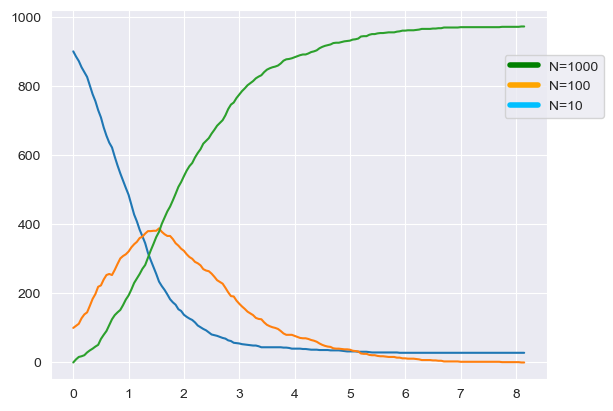

In [19]:
fig, ax0 = plt.subplots()
times = np.arange(0,tmax,tstep)
ax0.plot(times,np.array(reality_1))
legend_elements = [Line2D([0], [0], color='g', lw=4, label='N=1000'),
                   Line2D([0], [0], color='orange',lw=4, label='N=100'),
                       Line2D([0], [0], color='deepskyblue', lw=4, label='N=10')]
fig.legend(handles=legend_elements, bbox_to_anchor = (1,0.8))
fig.show

In [20]:
import numpy as np
from src.PLS.baseSIR import no_ext_sir
from src.PLS.baseSIR import real_sir
from src.PLS.baseSIR import real_sir_times
from src.PLS.baseSIR import timed_sir
from decimal import Decimal, ROUND_UP
import time
from src.PLS.ABC import ABC_core
from src.PLS.ABC import sum_sqrt_sq_distance
import os

distance_measure_array = ["sum_sq","sum_sqrt_sq","mixed","rinf"]
dis = distance_measure_array[1]
I0 = ["","_I1"][1]

seed = 1

if I0 == "":
    X0 = [900, 100, 0]
elif I0 == "_I1":
    X0 = [999,1,0]

gamma = 1
beta = 3
mu = 0
tstep = 0.05
test_time = 100
rng = np.random.default_rng(seed)
tmax = float(Decimal(tstep) * (Decimal(timed_sir(X0, mu, beta, gamma, test_time, rng) )/ Decimal(tstep)).quantize(1,rounding=ROUND_UP))
rng = np.random.default_rng(seed)
print(tmax)
start_time = time.time()
reality_2 = no_ext_sir(X0, mu, beta, gamma, tmax, tstep, rng)
print(f"Reality took {time.time() - start_time} seconds to run!")

15.600000000000001
Reality took 0.04610753059387207 seconds to run!


<bound method Figure.show of <Figure size 640x480 with 1 Axes>>

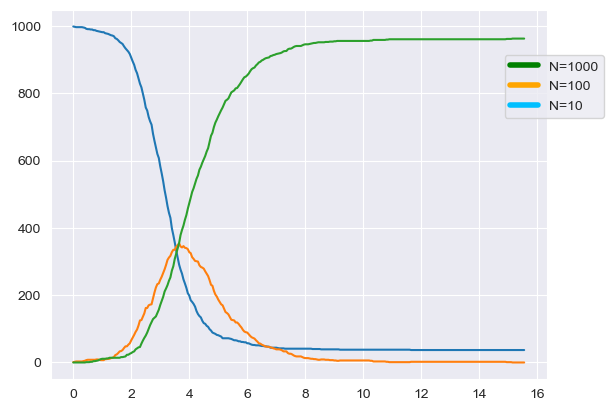

In [21]:
fig, ax0 = plt.subplots()
times = np.arange(0,tmax,tstep)
ax0.plot(times,np.array(reality_2))
legend_elements = [Line2D([0], [0], color='g', lw=4, label='N=1000'),
                   Line2D([0], [0], color='orange',lw=4, label='N=100'),
                       Line2D([0], [0], color='deepskyblue', lw=4, label='N=10')]
fig.legend(handles=legend_elements, bbox_to_anchor = (1,0.8))
fig.show